#Import the libraries



Image classification - convolutional neural network

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# To perform the Mathematical operation
import numpy as np

# Data Manipulation tool
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from random import shuffle  

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.preprocessing import LabelEncoder

# Transforms data in a natural way 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DL libraraies
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Libraries for cnn
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout

In [ ]:
flower_types=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

#Import the dataset

In [ ]:
# create 2 empty lists to append images from 5 folders 
x = []
w = []
image_size=150

daisy_path='/content/drive/MyDrive/shapeAI final projects/Daisy'
sunflower_path='/content/drive/MyDrive/shapeAI final projects/Sunflower'
tulip_path='/content/drive/MyDrive/shapeAI final projects/Tulip'
dandelion_path='/content/drive/MyDrive/shapeAI final projects/Dandelion'
rose_path='/content/drive/MyDrive/shapeAI final projects/Rose'

In [ ]:
# labeling each image in each folder 
def labeling(img,type_of_flower):
    return type_of_flower

In [ ]:
def x_data(type_of_flower,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = labeling(img,type_of_flower)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (image_size,image_size))
        
        x.append(np.array(img))
        w.append(str(label))

In [ ]:
import cv2                  # Used for computer vision problems.
from tqdm import tqdm       # creating Progress Meters or Progress Bars
import os                   # Creating, updating and removing directory 

In [ ]:
# get labeled daisy images 
x_data('Daisy',daisy_path)
print(len(x))

100%|██████████| 764/764 [00:05<00:00, 137.84it/s]

1528


In [ ]:
# get labeled sunflower images 
x_data('Sunflower',sunflower_path)
print(len(x))

100%|██████████| 733/733 [00:12<00:00, 59.01it/s] 

2261


In [ ]:
# get labeled tulip images 
x_data('Tulip',tulip_path)
print(len(x))

100%|██████████| 984/984 [00:17<00:00, 57.73it/s] 

3245


In [ ]:
# get labeled dandelion images 
x_data('Dandelion',dandelion_path)
print(len(x))

100%|██████████| 1062/1062 [00:18<00:00, 58.88it/s] 

4307


In [ ]:
# get labeled rose images 
x_data('Rose',rose_path)
print(len(x))

100%|██████████| 784/784 [00:12<00:00, 61.66it/s] 

5091


In [ ]:
def random_image(flower_types, flower_images, labels):
    
    index = np.random.randint(len(labels))    # Display random number 
    plt.figure()
    plt.imshow(flower_images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title('flower_Image #{} : '.format(index) + labels[index])   # Print the index and the label of the flower image 
    plt.show()

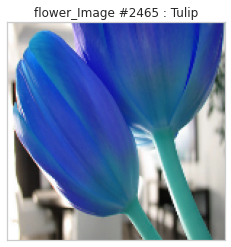

In [ ]:
random_image(flower_types, x, w)

#Encoding



In [ ]:
le = LabelEncoder()
y = le.fit_transform(w)     # Label encoding the flower labels. It gives a vector of integers 
y = to_categorical(y,5)     # Converts the vector to binary class matrix 
x2 = np.array(x)
x2 = x2/255

#Train test split 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.15, random_state=42)

In [ ]:
x_train.shape

(4327, 150, 150, 3)

In [ ]:
y_train.shape

(4327, 5)

###Set the seed

In [ ]:
np.random.seed(42)

#Modeling with CNN

Conv2D <-  Convolutional Layer

MaxPooling2D <- Pooling Layer (image is in 2D)

Dropout <- Avoid the Neural Network from Overfitting

Flatten <- Flattening the matrix from 2D to 1D

Dense <- Connected Neural Network

Activation <- Activation Function (Sigmoid, RelU, Softmax, Leaky RelU, TanH)

BatchNormalization <- Feature Scaling from 0-255 to 0-1

In [ ]:
model = Sequential()      # Hold the neural network 

##Add the layers to sequential

###Feature extraction

In [ ]:
# 1st layer / Input layer / Convolutional layer 
  # input_shape should be provided only for the 1st layer 
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))

# Pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#There should be minimum 3 layers 

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

###Flattening

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128      # number of training examples utilized in one iteration
epochs = 50

# ReduceLROnPlateau <- Reduce learning rate when a metric has stopped improving

# from keras.callbacks import ReduceLROnPlateau
# red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.1)

# factor <- factor by which the learning rate will be reduced
# verbose = 1 <- gives updating messages 

**Data augmentation <- generate new training samples from the original ones. But the labeling remains the same. It happens by doing changes to the original such as rescaling, rotating, fliping etc..**

**ImageDataGenerator <- return just the randomly transformed data**



In [ ]:
datagenerator = ImageDataGenerator(
        featurewise_center = False,                 # set input mean to 0 over the dataset
        samplewise_center = False,                  # set each sample mean to 0
        featurewise_std_normalization = False,      # divide inputs by std of the dataset
        samplewise_std_normalization = False,       # divide each input by its std
        zca_whitening = False,                      # apply ZCA whitening
        rotation_range = 10,                        # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                           # Randomly zoom image 
        width_shift_range = 0.2,                    # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.2,                   # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,                     # randomly flip images (horizontal)
        vertical_flip = False)                      # randomly flip images (vertical)


datagenerator.fit(x_train)

In [ ]:
model.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

#Training phase

In [ ]:
x_train.shape

(4327, 150, 150, 3)

In [ ]:
y_train.shape

(4327, 5)

**For training purpose, we replace the training data with randomly transformed augmented data and not use the original.**

**It gives the Loss and Accuracy of both Train and Test**

In [ ]:
Training = model.fit_generator(datagenerator.flow(x_train,y_train, batch_size=batch_size), epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/50
33/33 [==============================] - 42s 843ms/step - loss: 1.4940 - accuracy: 0.3579 - val_loss: 1.2372 - val_accuracy: 0.5262
Epoch 2/50
33/33 [==============================] - 25s 748ms/step - loss: 1.1828 - accuracy: 0.5039 - val_loss: 1.1187 - val_accuracy: 0.5327
Epoch 3/50
33/33 [==============================] - 25s 756ms/step - loss: 1.0445 - accuracy: 0.5759 - val_loss: 1.0447 - val_accuracy: 0.5812
Epoch 4/50
33/33 [==============================] - 26s 775ms/step - loss: 0.9482 - accuracy: 0.6242 - val_loss: 0.9577 - val_accuracy: 0.6414
Epoch 5/50
33/33 [==============================] - 26s 794ms/step - loss: 0.9161 - accuracy: 0.6402 - val_loss: 0.9464 - val_accuracy: 0.6466
Epoch 6/50
33/33 [==============================] - 25s 745ms/step - loss: 0.9113 - accuracy: 0.6413 - val_loss: 0.9198 - val_accuracy: 0.6348
Epoch 7/50
33/33 [==============================] - 27s 804ms/step - loss: 0.8607 - accuracy: 0.6706 - val_loss: 0.8777 - val_accuracy: 0.6846

**Epoch 50/50
33/33 [==============================] - 34s 1s/step - loss: 0.2302 - accuracy: 0.9143 - val_loss: 0.5733 - val_accuracy: 0.8259**

#Check accuracy

##Loss

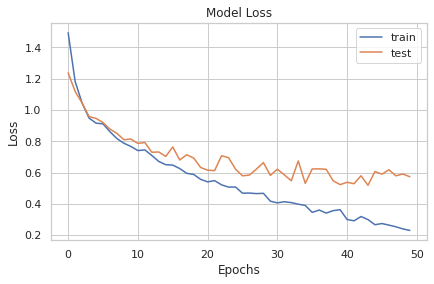

In [ ]:
plt.plot(Training.history['loss'])
plt.plot(Training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

**The loss has reduced with number of epochs. The rate of reduction of train loss is higher than rate of reduction of test loss.** 

##Accuracy

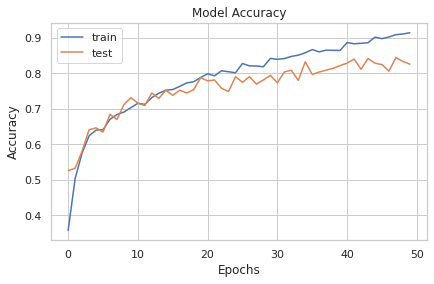

In [ ]:
plt.plot(Training.history['accuracy'])
plt.plot(Training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

**Accuracy of test set is closer and less than train set. Does not show overfitting.**

#Prediction

In [ ]:
# getting predictions on test set.
predictions = model.predict(x_test)
predicted_int = np.argmax(predictions, axis=1)

In [ ]:
test_int = np.argmax(y_test, axis=1)

In [ ]:
print("Accuracy : {}".format(accuracy_score(test_int, predicted_int)))

Accuracy : 0.8259162303664922


**Accuracy of model approx 82.6%.**

In [ ]:
# get the labels back 
predicted_labels = le.inverse_transform(predicted_int)

In [ ]:
def pred_image(flower_types, flower_images, w, labels):
    # show index, actual label and predicted label 
    index = np.random.randint(len(labels))    # Display random flower image with its label 
    plt.figure()
    plt.imshow(flower_images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title('flower_Image #{} : '.format(index) + 'Actual: ' + w[index] + '  Predicted: ' + labels[index])   # Print the index and the label of the flower image 
    plt.show()

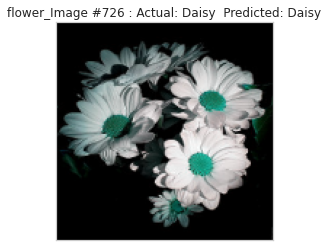

In [ ]:
pred_image(flower_types, x_test, w, predicted_labels)

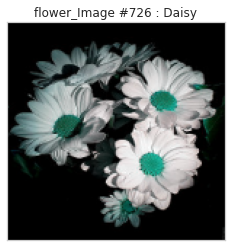

In [ ]:
   # check whether the above prediction is correct by seeing the original label from x_test
index = 726           # use above cell index 
plt.figure()
plt.imshow(x_test[index])
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.title('flower_Image #{} : '.format(index) + w[index])   # Print the index and the label of the flower image 
plt.show()

In [ ]:
# Display predictions 
def predicts(flower_types, images, labels):   
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Images of the dataset", fontsize=16)
    for i in range(36):
        plt.subplot(6,6,i+1)      # Display 36 images
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(flower_types[labels[i]])
    plt.show()

##Correct predictions

In [ ]:
# Display correct predictions 
def correct_preds(flower_types, test_images, test_labels, predicted_labels):
    correct = (test_labels == predicted_labels)
    labeled_index = np.where(correct == 1)
    labeled_flowers = test_images[labeled_index]
    labeled_labels = predicted_labels[labeled_index]

    title = "Labeled images"
    predicts(flower_types,  labeled_flowers, labeled_labels)

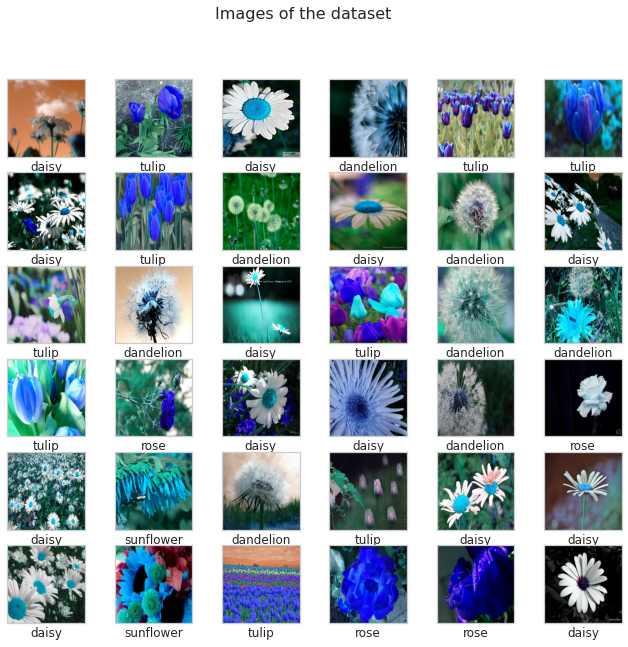

In [ ]:
correct_preds(flower_types, x_test, test_int, predicted_int)

##Wrong predictions

In [ ]:
# Display wrong predictions 
def wrong_preds(flower_types, test_images, test_labels, predicted_labels):
    correct = (test_labels == predicted_labels)
    mislabeled_index = np.where(correct == 0)
    mislabeled_flowers = test_images[mislabeled_index]
    mislabeled_labels = predicted_labels[mislabeled_index]

    title = "Mislabeled images"
    predicts(flower_types,  mislabeled_flowers, mislabeled_labels)

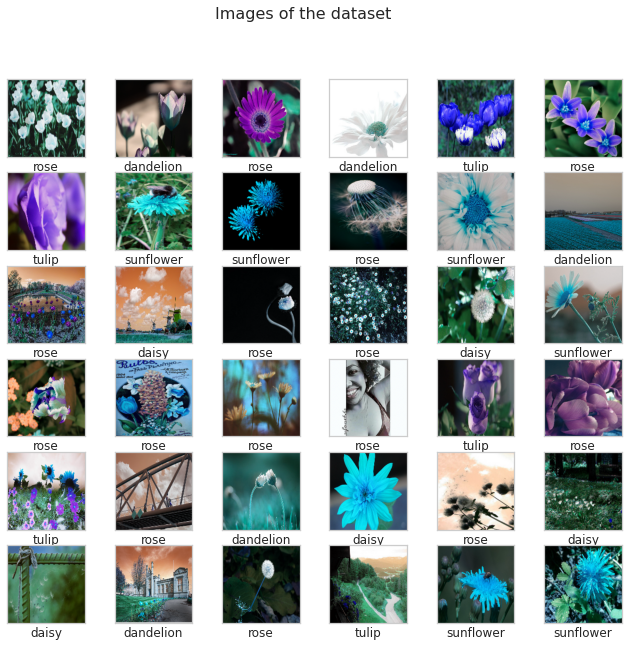

In [ ]:
wrong_preds(flower_types, x_test, test_int, predicted_int)

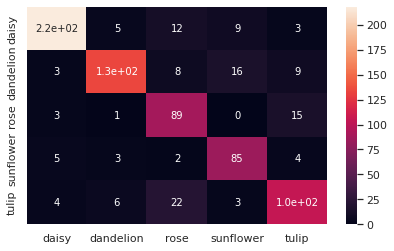

In [ ]:
CM = confusion_matrix(test_int, predicted_int)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws = {"size": 10}, 
           xticklabels = flower_types, 
           yticklabels = flower_types, ax = ax)
plt.show()

**Daisy has been more accurate**

**There is a prediction mistake in tulip and rose**

#Pickle

In [ ]:
import pickle

In [ ]:
with open('flower_model.pkl', 'wb') as files:
  pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://f19203ec-611e-40a3-93c2-32f8512a5a2c/assets


##--Extra--

In [ ]:
model.save('flower_model2.h5')

In [ ]:
import joblib
joblib.dump(datagenerator,'flower_datagenerator.pkl')

['flower_datagenerator.pkl']